# Transferencia dinámica de estados cuánticos

## Sin interacciones

In [20]:
#Importan las librerias necesarias
from qutip import *
import qutip as qt


import numpy as np
import matplotlib.pyplot as plt

Base fotónica

In [21]:
#Estado de vacío |0>:
p0=fock(4,0)

#primer estado excitado |1>:
p1=fock(4,1)

#segundo estado excitado |2>:
p2=fock(4,2)

#tercero estado excitado |3>:
p3=fock(4,3)

p1

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

Base de materia

1. Deseo escribir esta base utilizando la base de Dicke que ofrece python: https://qutip.org/docs/latest/apidoc/functions.html?highlight=wigner#qutip.piqs.dicke



2. Averiguar el porque los vectores de esta base son: |-J>, |-J+1>, |-J+2>, |-J+3>.

In [22]:
#Valor del momentum angular total
j = 3/2

#Según el valor de j, m puede tener 2*j...
jj=int(2*j)

#...más 1, el valor m=0


#Base de Dicke

#|-J+3>.
d3=qt.basis(jj + 1,jj-3)
#|-J+2>
d2=qt.basis(jj + 1,jj-2)
#|-J+1>
d1=qt.basis(jj + 1,jj-1)
#|-J> 
d0=qt.basis(jj + 1,jj)


d0

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]

Base global




Los sistemas modos de cavidad y emisores forman un solo sistema. Como consecuencia hay que expandir el espacio de Hilbert, esto significa que la base resultante se obtiene a partir de aplicar el producto vectorial entre los estados de estos vectores.

3. Investigar cuál es el motivo por el cual la base global es: |-J,3>, |-J+1,2>, |-J+2,1> y |-J+3,0>, ¿con la finalidad de que el número de exitación se conserve?

In [23]:
# |-J,3>
d0p3=tensor([d0,p3])
d0p3
# |-J+1,2>
d1p2=tensor([d1,p2])
d1p2
# |-J+2,1>
d2p1=tensor([d2,p1])
d2p1
# |-J+3,0>
d3p0=tensor([d3,p0])
d3p0


d1p2.full()

array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

## Hamiltoniano Tavis-Cummings

In [24]:
#Parámetros del sistema

#Número de fotones es tres, pero se debe incluir la posibilidad de que no hayan fotones dentro del sistema
N=4

#Número de emisores
n=3

#Momentum angular total
# j=3/2

#Proyección de j
m=-j

#Diferencia energética cavidad
wc=1

#Diferencia energética emisores
wa=1

#Fuerza de acoplamiento campo-materia
A=0.1

#Término que representa esa fuerza de acoplamiento en ese número de emisores
g=A/((n)**(1/2))


#Operadores del sistema


#Operadores de momentum angular para los emisores
jz=tensor(jmat(j,'z'), identity(N))

jmin=tensor(jmat(j,'-'), identity(N))

jmax=tensor(jmat(j,'+'), identity(N))



#Operador destrucción de los modos de cavidad
#La forma de la identity se hizo para que cuadrara las dimensiones con
#respecto a los operadores de materia
a =tensor(identity(jmin.dims[0][0]),destroy(N))


#Hamiltoniano de Tavis-Cummings
htc=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax)
htc

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 1.5         0.          0.          0.          0.          0.1
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          2.5         0.          0.          0.          0.
   0.14142136  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          3.5         0.          0.          0.
   0.          0.17320508  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          4.5         0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.5         0.
   0.          0.          0.          0.11547005  0.          0.
   0.          0.          0.        

## Proyección del Hamiltoniano de acuerdo a la base del sistema

In [105]:
a1=htc.matrix_element(d0p3.dag(),d0p3)
a2=htc.matrix_element(d0p3.dag(),d1p2)
a3=htc.matrix_element(d0p3.dag(),d2p1)
a4=htc.matrix_element(d0p3.dag(),d3p0)

b1=htc.matrix_element(d1p2.dag(),d0p3)
b2=htc.matrix_element(d1p2.dag(),d1p2)
b3=htc.matrix_element(d1p2.dag(),d2p1)
b4=htc.matrix_element(d1p2.dag(),d3p0)

c1=htc.matrix_element(d2p1.dag(),d0p3)
c2=htc.matrix_element(d2p1.dag(),d1p2)
c3=htc.matrix_element(d2p1.dag(),d2p1)
c4=htc.matrix_element(d2p1.dag(),d3p0)

d1=htc.matrix_element(d3p0.dag(),d0p3)
d2=htc.matrix_element(d3p0.dag(),d1p2)
d3=htc.matrix_element(d3p0.dag(),d2p1)
d4=htc.matrix_element(d3p0.dag(),d3p0)


#Representación matricial del hamiltoniano
h=np.array([[a1,a2,a3,a4],[b1,b2,b3,b4],[c1,c2,c3,c4],[d1,d2,d3,d4]])
hh=Qobj(h)
hh

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1.5        0.17320508 0.         0.        ]
 [0.17320508 1.5        0.16329932 0.        ]
 [0.         0.16329932 1.5        0.1       ]
 [0.         0.         0.1        1.5       ]]

Este resultado corresponde a la expresión (7), evaluando los parámetros de este ejemplo.

### Como mi trabajo consiste en la transferencia DINÁMICA de estados, hay que resolver la ecuación de Schrödinger dependiente del tiempo para ver como evoluciona el sistema

Aún persiste una duda con la condiición inicial. 
Con la condición inicial 'initial' se arreglar el problema de que las trazas parciales da diferente.

Y la función de correlación de sgundo orden, sube a valores cercanos a 4, como en el artículo.

In [106]:
#Coeficientes de la...
n0=((2)**(1/2))/3
n3=((7)**(1/2))/3
#...condicion inicial
# psi0=n0*d3p0+n3*d0p3

star=n0*p0+n3*p3
initial=tensor(d0,star)


#Tiempo en el que evoluciona el sistema
tlist=np.linspace(start=0,stop=500,num=500)

#Solución de la ecuación de Schrödinger
resultado=sesolve(htc, initial, tlist, e_ops=None, args=None, options=None, progress_bar=None, _safe_mode=True)

#Forma de acceder a los estados del sistema
resultado.states

#El número de estados que surgen, corresponde al numero num
#ya que son los 'puntos' que se toman del lapso. En cada punto, se conocen 
#los estados del sistema.
len(resultado.states)

500

In [107]:
initial.full()

array([[0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.47140452+0.j],
       [0.        +0.j],
       [0.        +0.j],
       [0.8819171 +0.j]])

## Matriz de densidad

In [108]:
def rho(x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser UN número menor al número de estados puestos en el linspace del sesolve"
    
    return(resultado.states[x]*resultado.states[x].dag())

#Esta sería la matriz de densidad del estado 59
rho(59)

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 8.21431589e-03+0.00000000e+00j -2.39130236e-03-7.42306691e-03j
   5.32703471e-03-4.91609369e-03j  1.38458460e-02-1.70017462e-02j
  -1.54415174e-03+1.36989985e-02j  5.79815589e-03+1.26422126e-04j
   3.69209999e-03+7.42861373e-03j -1.33975660e-02+3.73557885e-02j
  -2.27991885e-02-6.22778437e-03j  2.19404691e-03+7.46191292e-03j
  -5.36587674e-03+1.29061878e-02j -1.81933960e-02-5.69660276e-02j
   2.15006090e-02-2.17640672e-02j  6.10049301e-03-1.66897153e-03j
  -1.13595253e-02-1.17386349e-02j  5.11385286e-03-5.07451224e-03j]
 [-2.39130236e-03+7.42306691e-03j  7.40417708e-03+0.00000000e+00j
   2.89177359e-03+6.24504856e-03j  1.13333230e-02+1.74615829e-02j
  -1.19299100e-02-5.38338066e-03j -1.80216880e-03+5.20284175e-03j
  -7.78786999e-03+1.17388275e-03j -2.98572504e-02-2.29818304e-02j
   1.22650522e-02-1.87900476e-02j -7.38185739e-03-1.89563320e-04j
  -1.01009095e-02-8.60617735e-03j  5.677509

### Trazas parciales

In [109]:
#Se preservan los componentes 1.
#Se preservan los fotones, y esto corresponde a p_ph para el estado 0
rho(0).ptrace(1)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.22222222 0.         0.         0.41573971]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.41573971 0.         0.         0.77777778]]

In [110]:
#Se preservan los componentes 0.
#Se preservan lo emisores esto corresponde a p_D para el estado 0
rho(0).ptrace(0)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]

Y esto es un problema, que dan la misma matriz de densidad reducida. Me pregunto si eso es un efecto debido a la forma en como se construyó la base del sistema...

## Entropía Lineal

In [111]:
def entropia (x):
    "Entropía lineal usando un ket"
    rho(x)
    return(entropy_linear(rho(x).ptrace(0)))


#Entropía lineal para el estado 2, es decir: t=2
entropia(1)

0.030609665477419834

## Gráfica Entropía Lineal

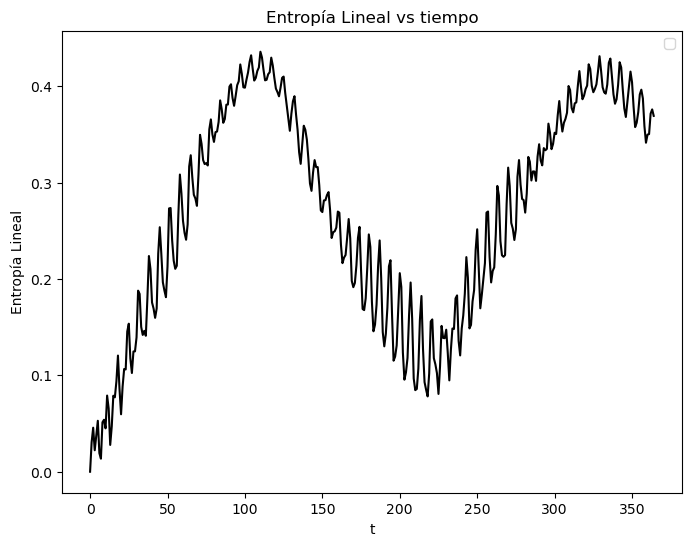

In [112]:
# Este es el  espacio donde se va a dinujar la gráfica

#El eje x va desde 0 hasta 365
x_vals=[i for i in range(365)]

#Se evalúan los valores de la entropía lineal para todos los valores de x
#valores de entropía lineal para el estado x
y1_vals=[]

for i in range(len(x_vals)):
    y1_vals.append(entropia(i))
    

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1_vals, linestyle='-', color='black')
plt.title('Entropía Lineal vs tiempo')
plt.xlabel('t')
plt.ylabel('Entropía Lineal')
plt.legend()
plt.grid(False)
plt.show()

## Gráfica función de correlación segundo orden $\tau=0$

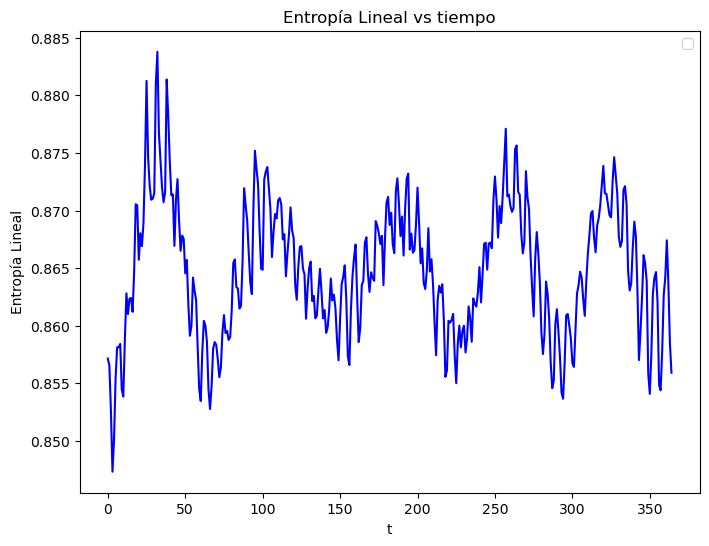

In [113]:
#operadores para crear la función de correlacion óptica de segundo orden
up=a.dag()*a.dag()*a*a
down=a.dag()*a

#Funcion de correlacion
def correlacion (x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser un número menor al número de estados puestos en el linspace del sesolve"
    numerador=expect(up, resultado.states[x])
    denominador=expect(down, resultado.states[x])*expect(down, resultado.states[x])
    return(numerador/denominador)

#x es un valor menor a num, que corresponde al valor del eje x de la grafica
x_vals=[i for i in range(365)]

#Valores de función de correlacion de segundo orden para el estado x
y2_vals=[]

for i in range(len(x_vals)):
    y2_vals.append(correlacion(i))
    
# Graficar los valores de x e y
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y2_vals, linestyle='-', color='b')
plt.title('Entropía Lineal vs tiempo')
plt.xlabel('t')
plt.ylabel('Entropía Lineal')
plt.legend()
plt.grid(False)
plt.show()

# Graficas de ambas cantidades superpuestas

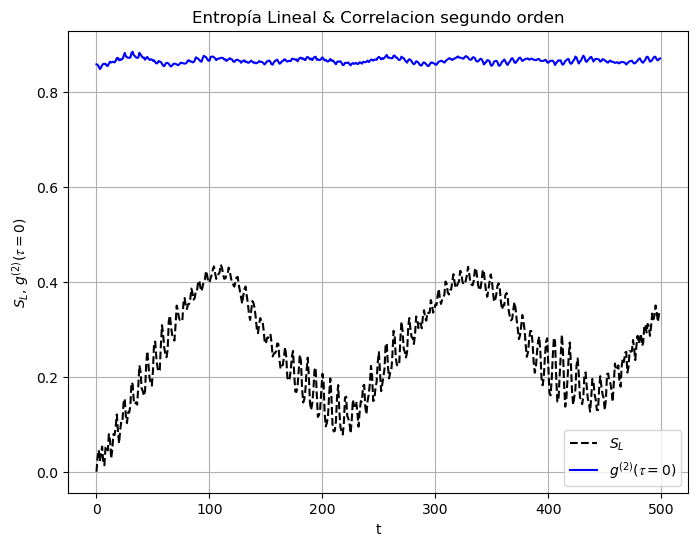

In [134]:
def entropiaycorrelacion(final):
    "Grafica entropía lineal y función de correlación óptica de segundo orden."
    "Argumento: final"
    "Corresponde al valor más grande de la absisa de la gráfica"
    
    
    x_vals=[i for i in range(final)]
    
    y2_vals=[]
    for i in range(len(x_vals)):
        y2_vals.append(correlacion(i))
    
    y1_vals=[]
    for i in range(len(x_vals)):
        y1_vals.append(entropia(i))
        

    # Graficar las dos funciones superpuestas
    plt.figure(figsize=(8, 6))

    # Graficar la primera función
    plt.plot(x_vals, y1_vals, label='$S_L$', linestyle='--',color='black')

    # Graficar la segunda función
    plt.plot(x_vals, y2_vals, label='$g^{(2)}(𝜏=0)$', linestyle='-', color='blue')



    plt.title('Entropía Lineal & Correlacion segundo orden')
    plt.xlabel('t')
    plt.ylabel('$S_L$, $g^{(2)}(𝜏=0)$')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    
    
entropiaycorrelacion(500)

## Graficos de los elementos matriciales para los operadores de densidad reducidos

### Fotónico

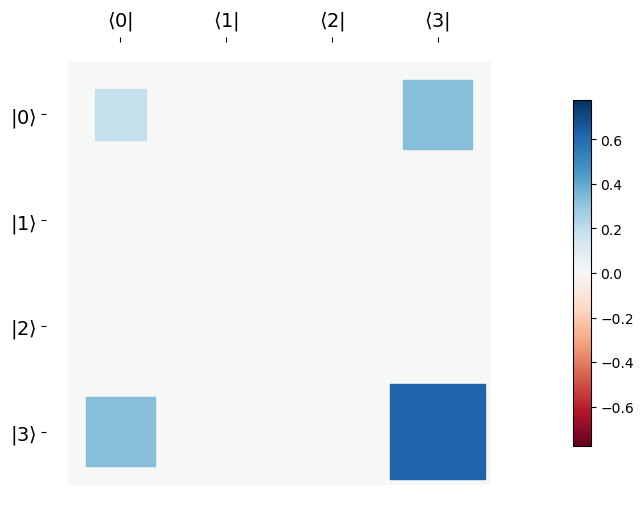

In [115]:
hinton(rho(0).ptrace(1))
plt.show()

## Winger funtion

Son cuestiones internas de la librería, o porque aquí no hubo necesidad de exoresar esto utilizando el operador de desplazamiento fotónico?

(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

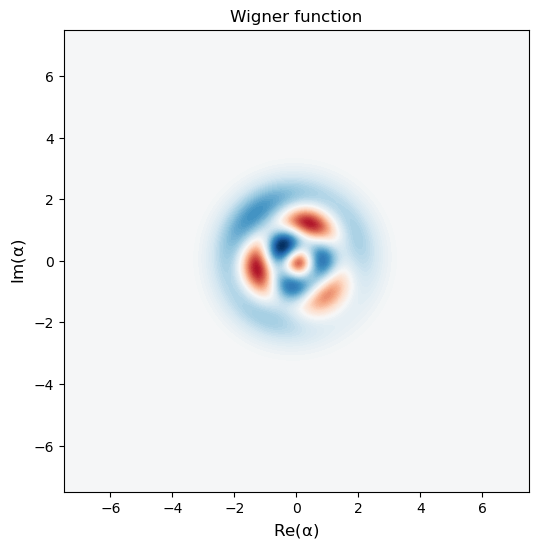

In [130]:
plot_wigner(rho(4).ptrace(1), fig=None, ax=None, figsize=(6, 6), cmap=None, alpha_max=7.5, colorbar=False, method='clenshaw', projection='2d')
# plot_wigner(rho(0).ptrace(0), fig=None, ax=None, figsize=(6, 6), cmap=None, alpha_max=7.5, colorbar=False, method='clenshaw', projection='2d')

### De materia

Este punto deberia estar en 00, ¿no es así?

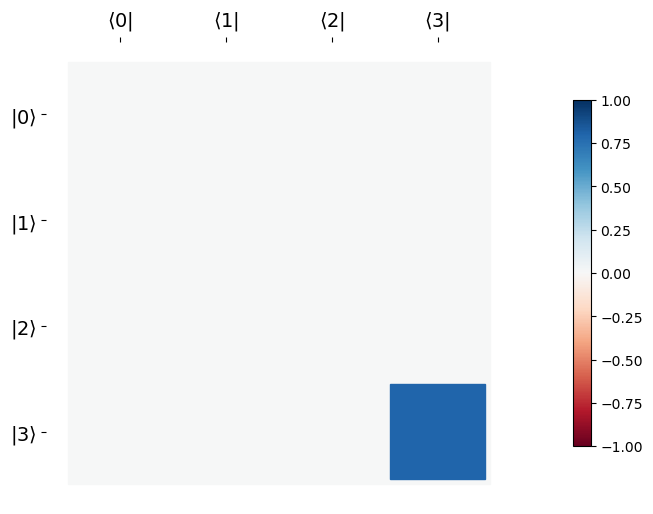

In [117]:
hinton(rho(0).ptrace(0))
plt.show()

¿Por qué en el artículo lo proyectan en la esfera de Bloch?

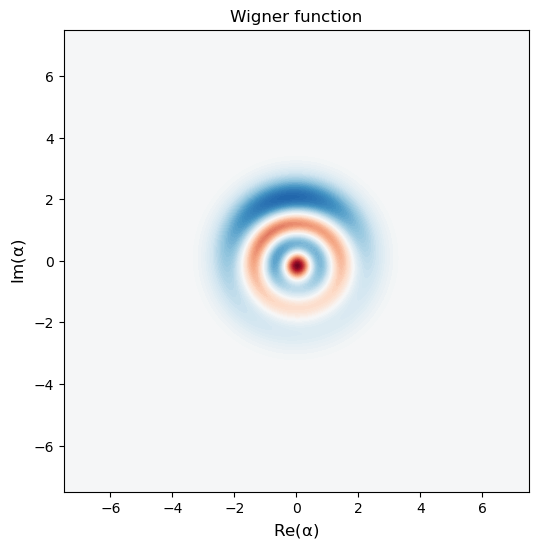

In [123]:
r=plot_wigner(rho(7).ptrace(0), fig=None, ax=None, figsize=(6, 6), cmap=None, alpha_max=7.5, colorbar=False, method='clenshaw', projection='2d')


# Con interacciones

Con interacción Ising

In [100]:
#Parámetros del sistema

#Número de fotones es tres, pero se debe incluir la posibilidad de que no hayan fotones dentro del sistema
N=4

#Número de emisores
n=3

#Momentum angular total
# j=3/2

#Proyección de j
m=-j

#Diferencia energética cavidad
wc=1

#Diferencia energética emisores
wa=1

#Fuerza de acoplamiento campo-materia
A=0.1

#Término que representa esa fuerza de acoplamiento en ese número de emisores
g=A/((n)**(1/2))

tising=2*0.01


#Operadores del sistema


#Operadores de momentum angular para los emisores
jz=tensor(jmat(j,'z'), identity(N))

jmin=tensor(jmat(j,'-'), identity(N))

jmax=tensor(jmat(j,'+'), identity(N))



#Operador destrucción de los modos de cavidad
#La forma de la identity se hizo para que cuadrara las dimensiones con
#respecto a los operadores de materia
a =tensor(identity(jmin.dims[0][0]),destroy(N))


#Hamiltoniano de Tavis-Cummings
htc=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax)+tising*jz
htc

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 1.53        0.          0.          0.          0.          0.1
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          2.53        0.          0.          0.          0.
   0.14142136  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          3.53        0.          0.          0.
   0.          0.17320508  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          4.53        0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.51        0.
   0.          0.          0.          0.11547005  0.          0.
   0.          0.          0.        

Con interaccion dipolo-dipolo

In [103]:
tdipolo=2*0.4

htc=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax) + tdipolo*(jmax+jmin)

Con ambas

In [102]:
htc=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax) + tdipolo*(jmax+jmin) + tising*jz